<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-10197.423645,-10023.646038,538.119475,-10561.765513
1,0.0,1.0,78.224365,71.504446,-1180.719557,-1020.990745,366.460182,-1387.450927
2,0.0,2.0,82.510208,98.817934,-507.939838,-316.611696,632.557313,-949.169009
3,0.0,3.0,32.364824,49.137973,1923.793002,2015.295799,77.296280,1937.999519
4,0.0,4.0,36.782453,61.690156,-934.699743,-826.227134,203.703138,-1029.930272
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,2308.490281,2411.835124,31.416860,2380.418264
119996,999.0,116.0,27.020199,57.926652,-2071.986608,-1977.039757,80.869491,-2057.909248
119997,999.0,117.0,85.618733,77.465554,3179.711257,3352.795544,-26.053018,3378.848562
119998,999.0,118.0,70.637414,53.375372,418.953278,552.966065,82.462832,470.503233


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    73.285598  90.492009 -10197.423645 -10023.646038  538.119475   
      1.0    78.224365  71.504446  -1180.719557  -1020.990745  366.460182   
      2.0    82.510208  98.817934   -507.939838   -316.611696  632.557313   
      3.0    32.364824  49.137973   1923.793002   2015.295799   77.296280   
      4.0    36.782453  61.690156   -934.699743   -826.227134  203.703138   
...                ...        ...           ...           ...         ...   
999.0 115.0  23.443661  69.901182   2308.490281   2411.835124   31.416860   
      116.0  27.020199  57.926652  -2071.986608  -1977.039757   80.869491   
      117.0  85.618733  77.465554   3179.711257   3352.795544  -26.053018   
      118.0  70.637414  53.375372    418.953278    552.966065   82.462832   
      119.0  68.470341  95.213343  -3047.004416  -2873.320732  -94.525191   

                    e_hat  
rep   index                
0.0   0.0   -10561.765513  
      1.0    -1387.450927  
      2.0     -949.169009  
      3.0     1937.999519  
      4.0    -1029.930272  
...                   ...  
999.0 115.0   2380.418264  
      116.0  -2057.909248  
      117.0   3378.848562  
      118.0    470.503233  
      119.0  -2778.795541  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    73.285598  90.492009 -10197.423645 -10023.646038  538.119475   
      1.0    78.224365  71.504446  -1180.719557  -1020.990745  366.460182   
      2.0    82.510208  98.817934   -507.939838   -316.611696  632.557313   
      3.0    32.364824  49.137973   1923.793002   2015.295799   77.296280   
      4.0    36.782453  61.690156   -934.699743   -826.227134  203.703138   
...                ...        ...           ...           ...         ...   
999.0 115.0  23.443661  69.901182   2308.490281   2411.835124   31.416860   
      116.0  27.020199  57.926652  -2071.986608  -1977.039757   80.869491   
      117.0  85.618733  77.465554   3179.711257   3352.795544  -26.053018   
      118.0  70.637414  53.375372    418.953278    552.966065   82.462832   
      119.0  68.470341  95.213343  -3047.004416  -2873.320732  -94.525191   

                    e_hat  
rep   index                
0.0   0.0   -10561.765513  
      1.0    -1387.450927  
      2.0     -949.169009  
      3.0     1937.999519  
      4.0    -1029.930272  
...                   ...  
999.0 115.0   2380.418264  
      116.0  -2057.909248  
      117.0   3378.848562  
      118.0    470.503233  
      119.0  -2778.795541  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-10197.423645,-10023.646038,538.119475,-10561.765513
1,0.0,1.0,78.224365,71.504446,-1180.719557,-1020.990745,366.460182,-1387.450927
2,0.0,2.0,82.510208,98.817934,-507.939838,-316.611696,632.557313,-949.169009
3,0.0,3.0,32.364824,49.137973,1923.793002,2015.295799,77.296280,1937.999519
4,0.0,4.0,36.782453,61.690156,-934.699743,-826.227134,203.703138,-1029.930272
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,2308.490281,2411.835124,31.416860,2380.418264
119996,999.0,116.0,27.020199,57.926652,-2071.986608,-1977.039757,80.869491,-2057.909248
119997,999.0,117.0,85.618733,77.465554,3179.711257,3352.795544,-26.053018,3378.848562
119998,999.0,118.0,70.637414,53.375372,418.953278,552.966065,82.462832,470.503233


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    73.285598  90.492009 -10197.423645 -10023.646038  538.119475   
      1.0    78.224365  71.504446  -1180.719557  -1020.990745  366.460182   
      2.0    82.510208  98.817934   -507.939838   -316.611696  632.557313   
      3.0    32.364824  49.137973   1923.793002   2015.295799   77.296280   
      4.0    36.782453  61.690156   -934.699743   -826.227134  203.703138   
...                ...        ...           ...           ...         ...   
999.0 115.0  23.443661  69.901182   2308.490281   2411.835124   31.416860   
      116.0  27.020199  57.926652  -2071.986608  -1977.039757   80.869491   
      117.0  85.618733  77.465554   3179.711257   3352.795544  -26.053018   
      118.0  70.637414  53.375372    418.953278    552.966065   82.462832   
      119.0  68.470341  95.213343  -3047.004416  -2873.320732  -94.525191   

                    e_hat  
rep   index                
0.0   0.0   -10561.765513  
      1.0    -1387.450927  
      2.0     -949.169009  
      3.0     1937.999519  
      4.0    -1029.930272  
...                   ...  
999.0 115.0   2380.418264  
      116.0  -2057.909248  
      117.0   3378.848562  
      118.0    470.503233  
      119.0  -2778.795541  

[120000 rows x 6 columns]

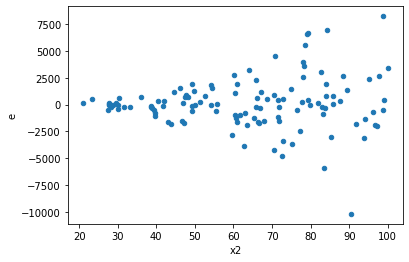

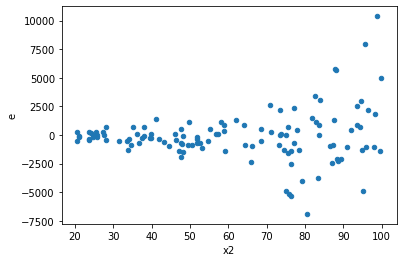

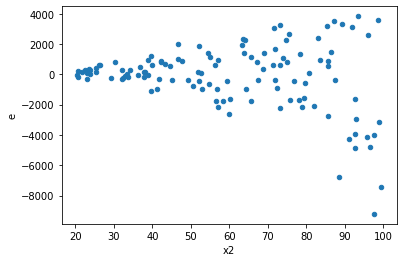

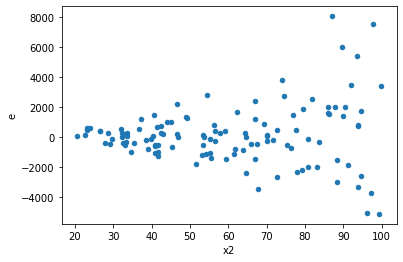

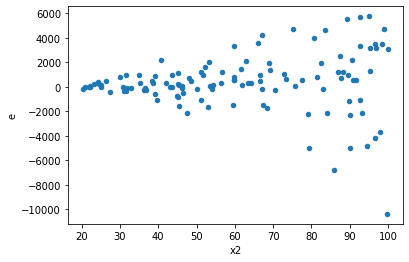

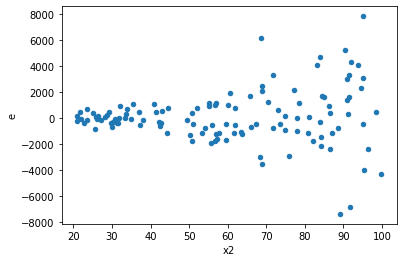

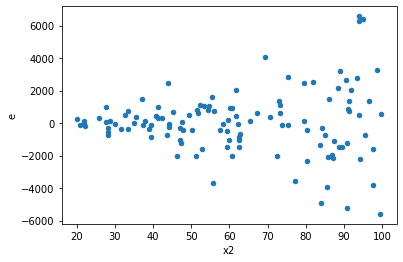

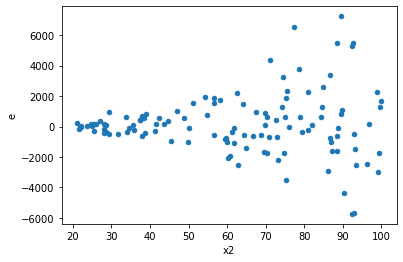

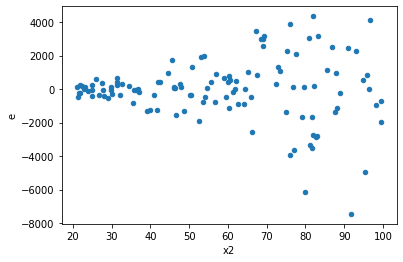

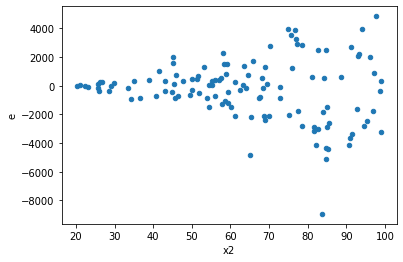

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,65.0,51.0,364655360.0631936,321856610.11303735,5610082.4625106715,6310913.923785046,1.1249235578902226,0.6663199294272508,0.6668400352863746,0.3331599647136254,Reject001=1 : Homoscedasticity
4.0,51.0,65.0,196854595.646744,423313730.6909206,3859894.0322890985,6512518.933706471,1.6872273899820616,0.04669946975873196,0.976650265120634,0.02334973487936598,Reject001=1 : Homoscedasticity
6.0,57.0,59.0,40040715.63940753,407531237.7019217,702468.6954282023,6907309.113591894,9.83290665982122,1.5543122344752192e-15,0.9999999999999992,7.771561172376096e-16,Reject001=0 : Heteroscedasticity
7.0,47.0,69.0,17127646.42516804,459850257.12244546,364418.00904612854,6664496.480035442,18.288054691588638,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,60.0,56.0,39545559.09490948,388766187.90490097,659092.6515818246,6942253.35544466,10.53304620948698,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject001=0 : Heteroscedasticity
15.0,60.0,56.0,67748558.4228153,244311211.8499992,1129142.640380255,4362700.211607128,3.863728155849226,9.205968936054632e-07,0.9999995397015532,4.602984468027316e-07,Reject001=0 : Heteroscedasticity
16.0,61.0,55.0,39746795.18988851,306449897.25046086,651586.8063916148,5571816.313644743,8.551149684108223,1.4721557306529576e-13,0.9999999999999264,7.360778653264788e-14,Reject001=0 : Heteroscedasticity
17.0,53.0,63.0,23397296.918528683,374486099.1724671,441458.4324250695,5944223.796388367,13.46496829550833,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
20.0,59.0,57.0,64316288.014805436,350620578.0950812,1090106.576522126,6151238.212194407,5.642786076769949,6.348519487886506e-10,0.999999999682574,3.174259743943253e-10,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,65.0,51.0,364655360.0631936,321856610.11303735,5610082.4625106715,6310913.923785046,1.1249235578902226,0.6663199294272508,Reject001=1 : Homoscedasticity
1.0,57.0,59.0,512005464.0861031,27226772.83396416,8982552.001510581,461470.72599939257,0.051374122401049035,1.3593922555651e-22,Reject001=0 : Heteroscedasticity
2.0,56.0,60.0,409599486.660669,41912330.50127505,7314276.547511947,698538.8416879175,0.09550347695364829,1.0144769304701341e-15,Reject001=0 : Heteroscedasticity
3.0,70.0,46.0,326236990.38185346,111825048.26897004,4660528.434026478,2430979.310195001,0.5216102303864175,0.013650918439342397,Reject001=1 : Homoscedasticity
4.0,51.0,65.0,196854595.646744,423313730.6909206,3859894.0322890985,6512518.933706471,1.6872273899820616,0.04669946975873196,Reject001=1 : Homoscedasticity
5.0,61.0,55.0,483283716.1059358,27983701.18309989,7922683.870589112,508794.5669654525,0.0642199758662868,5.634174132899742e-21,Reject001=0 : Heteroscedasticity
6.0,57.0,59.0,40040715.63940753,407531237.7019217,702468.6954282023,6907309.113591894,9.83290665982122,1.5543122344752192e-15,Reject001=0 : Heteroscedasticity
7.0,47.0,69.0,17127646.42516804,459850257.12244546,364418.00904612854,6664496.480035442,18.288054691588638,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,53.0,63.0,330698078.6512269,44291786.811012246,6239586.38964579,703044.2350954325,0.1126748138726136,1.294451881591833e-13,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    647
Reject001=1 : Homoscedasticity      353
Name: Result_test, dtype: int64